# VERSION CONTROL
- download data
- initial formatting in Excel
- make a repository & commit in master
- checkout to different branch

# IMPORTS

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from joblib import dump

# LOADING

In [2]:
housing_df=pd.read_excel("housing.xlsx")
housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# FORMATTING

In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9    TAX      506 non-null    int64  
 10   PTRATIO  506 non-null    float64
 11   B        506 non-null    float64
 12   LSTAT    506 non-null    float64
 13   MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
old_columns_new_columns_dict={}
for i,j in zip(housing_df.columns,housing_df.columns.str.strip()):
    old_columns_new_columns_dict[i]=j
old_columns_new_columns_dict

{'CRIM    ': 'CRIM',
 'ZN      ': 'ZN',
 'INDUS   ': 'INDUS',
 'CHAS    ': 'CHAS',
 'NOX     ': 'NOX',
 'RM      ': 'RM',
 'AGE     ': 'AGE',
 'DIS     ': 'DIS',
 'RAD     ': 'RAD',
 ' TAX    ': 'TAX',
 ' PTRATIO': 'PTRATIO',
 ' B      ': 'B',
 ' LSTAT  ': 'LSTAT',
 ' MEDV   ': 'MEDV'}

In [5]:
housing_df_renamed_columns=housing_df.rename(columns=old_columns_new_columns_dict)
housing_df_renamed_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing_df_renamed_columns.to_csv("housing.csv",index=False)

# ANALYZE BEFORE SPLIT
- relationship btw features & target
- dispersion of features & target
- nature of features & target

In [7]:
bin_size=int(np.ceil(np.sqrt(len(housing_df_renamed_columns))))
bin_size

23

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

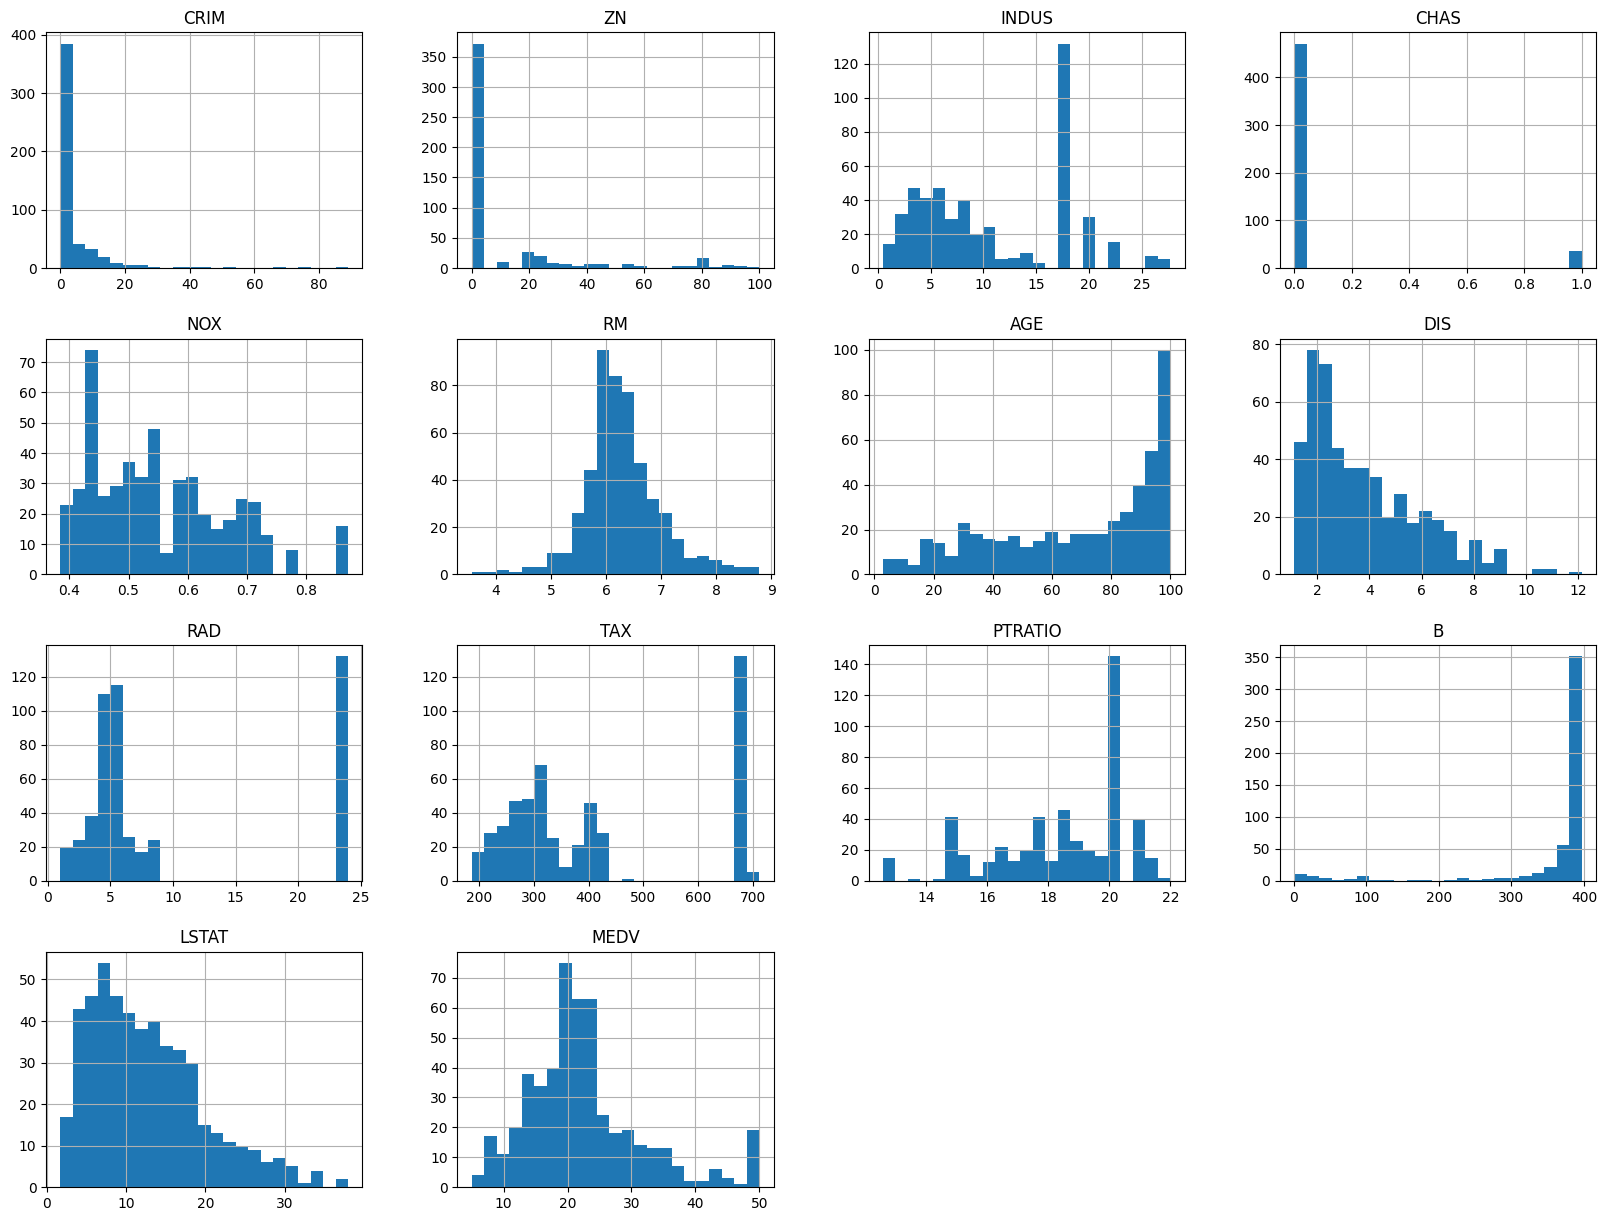

In [8]:
housing_df_renamed_columns.hist(bins=bin_size,figsize=(20,15))

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

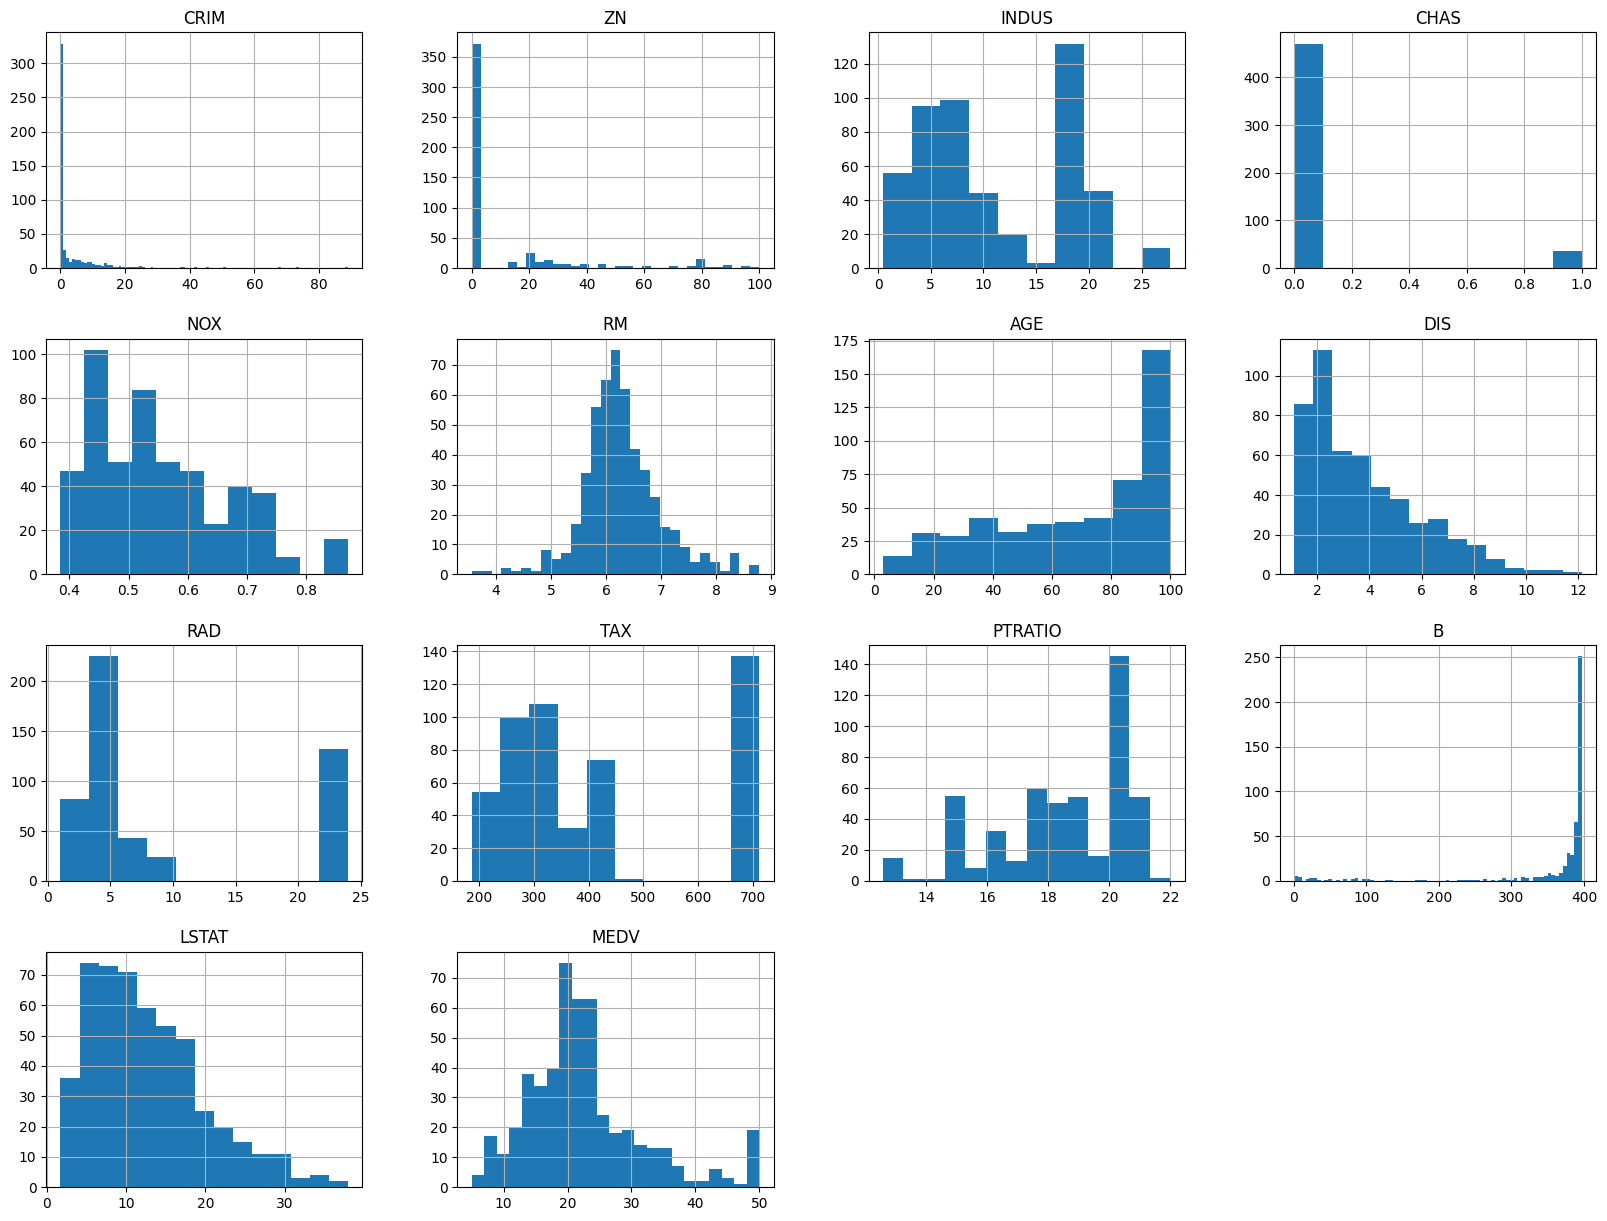

In [9]:
housing_df_renamed_columns.hist(bins='auto',figsize=(20,15))

In [10]:
corr_df=housing_df_renamed_columns.corr().sort_values(by='MEDV',ascending=False)
corr_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.000000
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
B,-0.385064,0.175520,-0.356977,0.048788,-0.380051,0.128069,-0.273534,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.366087,0.333461
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


Text(0.5, 1.0, '*correlation btw attributes*')

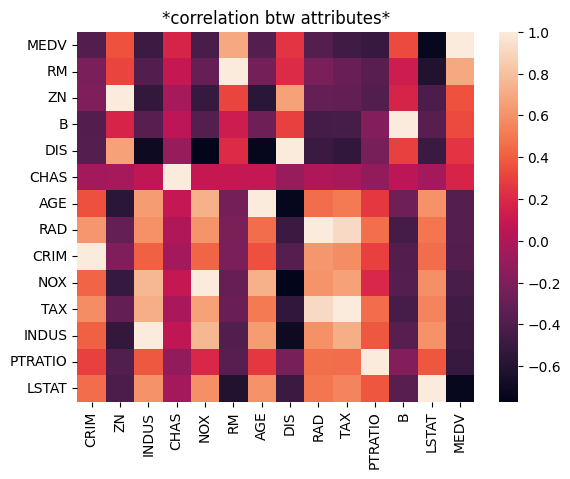

In [11]:
sns.heatmap(
    data=corr_df
)
plt.title('*correlation btw attributes*')

In [12]:
housing_df_renamed_columns.value_counts("CHAS")

CHAS
0    471
1     35
Name: count, dtype: int64

In [13]:
471/35

13.457142857142857

# COMMENTS ON DIFFERENT FEATURES
- important features are : `RM`,`LSTAT` for target `MEDV`
- `CHAS` :
    - is a categorical data : 0s & 1s
    - 1s are the minority in the imbalanced data & split should be stratified to maintain the ratio of 1s in train & test data so that 1s are appropriately represented in both the data sets
- `INDUS` correlated with `NOX` & `TAX`
- `ZN` is correlated with `AGE`
- `AGE` correlated with `NOX`
- `RAD` highly correlated with `TAX`
-  `LSTAT` is correlated with `INDUS`

# SPLIT

In [14]:
stratified_shuffle_split_object=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for i,j in stratified_shuffle_split_object.split(housing_df_renamed_columns,housing_df_renamed_columns.CHAS):
    train_indices_array=i
    test_indices_array=j
    
print(i.shape,j.shape,sep='\n')

(404,)
(102,)


In [15]:
type(i)

numpy.ndarray

In [16]:
train_set=housing_df_renamed_columns.iloc[i]
test_set=housing_df_renamed_columns.iloc[j]

# ANALYZE TRAIN SET

In [17]:
train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [18]:
correlation_df=train_set.corr().loc[:,['MEDV']].sort_values('MEDV',ascending=False)
correlation_df

,MEDV
MEDV,1.000000
RM,0.679894
B,0.361761
ZN,0.339741
DIS,0.240451
CHAS,0.205066
AGE,-0.364596
RAD,-0.374693
CRIM,-0.393715
NOX,-0.422873


<Axes: >

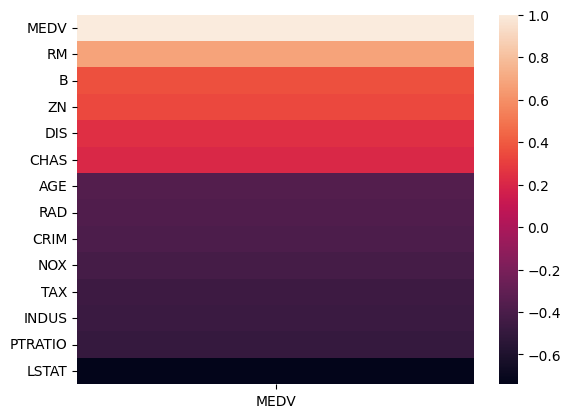

In [19]:
sns.heatmap(data=correlation_df)

In [20]:
strong_features_list=correlation_df.iloc[[0,1,2,-2,-1]].index.tolist()
strong_features_list

['MEDV', 'RM', 'B', 'PTRATIO', 'LSTAT']

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='B', ylabel='MEDV'>,
        <Axes: xlabel='PTRATIO', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='B', ylabel='RM'>,
        <Axes: xlabel='PTRATIO', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='B'>,
        <Axes: xlabel='RM', ylabel='B'>, <Axes: xlabel='B', ylabel='B'>,
        <Axes: xlabel='PTRATIO', ylabel='B'>,
        <Axes: xlabel='LSTAT', ylabel='B'>],
       [<Axes: xlabel='MEDV', ylabel='PTRATIO'>,
        <Axes: xlabel='RM', ylabel='PTRATIO'>,
        <Axes: xlabel='B', ylabel='PTRATIO'>,
        <Axes: xlabel='PTRATIO', ylabel='PTRATIO'>,
        <Axes: xlabel='LSTAT', ylabel='PTRATIO'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
      

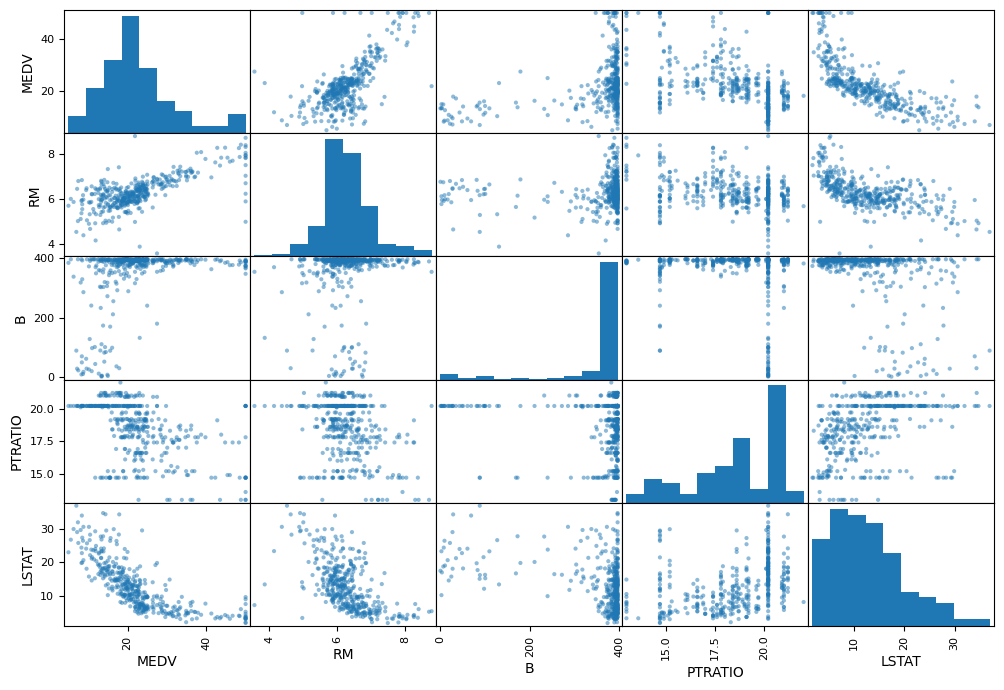

In [21]:
scatter_matrix(train_set[strong_features_list],figsize=(12,8))

# COMMENTS
- LSTAT & RM can be a good predictor for MEDV as we can see the trends(feature vs target)
- LSTAT & RM has outliers too

# SCALING

In [22]:
train_set_features=train_set.iloc[:,:13]
train_set_target=train_set.iloc[:,13]
train_set_features.shape

(404, 13)

In [23]:
pipeline_object=Pipeline([
    ('scaler', StandardScaler())
])

train_set_scaled_features_array=pipeline_object.fit_transform(train_set_features)
train_set_scaled_features_array.shape

(404, 13)

# USING DIFFERNT MODELS

`LINEAR REGRESSON`

In [24]:
linear_regression_model=LinearRegression()
linear_regression_model.fit(train_set_scaled_features_array,train_set_target)

LinearRegression()

In [25]:
coef_array=linear_regression_model.coef_
coef_array

array([-0.53859116,  0.82011884,  0.24916678,  0.84013464, -2.15381579,
        2.69919117,  0.24483568, -2.91024203,  2.42317778, -1.84376829,
       -2.12904379,  1.02858558, -4.08798371])

In [26]:
intercept=linear_regression_model.intercept_
intercept

22.509405940594053

In [27]:
print(f"Equation of the fitted model: y = {intercept:.2f} + {" + ".join([f"{i}x{j}" for i,j in zip(coef_array,range(1,14))])}")

Equation of the fitted model: y = 22.51 + -0.5385911641341117x1 + 0.8201188402342998x2 + 0.24916677757907552x3 + 0.8401346401009846x4 + -2.1538157939956815x5 + 2.699191169067207x6 + 0.2448356769498841x7 + -2.910242032776095x8 + 2.423177779825638x9 + -1.8437682880656885x10 + -2.1290437918665868x11 + 1.0285855814094458x12 + -4.0879837123334095x13


In [28]:
housing_df_renamed_columns.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

###### IN EQUATION
- weight -4.08798371 was given to LSTAT & 2.69919117 to RM

`DECISION TREE REGRESSOR`

In [29]:
decision_tree_regressor_model=DecisionTreeRegressor()
decision_tree_regressor_model.fit(train_set_scaled_features_array,train_set_target)

DecisionTreeRegressor()

`RANDOM FOREST`

In [30]:
random_forest_regressor_model=RandomForestRegressor()
random_forest_regressor_model.fit(train_set_scaled_features_array,train_set_target)

RandomForestRegressor()

# EVALUATING DIFFERENT MODELS

In [31]:
scores_linear_regression_model=cross_val_score(linear_regression_model,train_set_scaled_features_array,train_set_target,scoring='neg_root_mean_squared_error',cv=10)
scores_linear_regression_model

array([-4.21674442, -4.26026816, -5.1071608 , -3.82881892, -5.34093789,
       -4.3785611 , -7.47384779, -5.48226252, -4.14885722, -6.0669122 ])

In [32]:
scores_decision_tree_regressor_model=cross_val_score(decision_tree_regressor_model,train_set_scaled_features_array,train_set_target,scoring='neg_root_mean_squared_error',cv=10)
scores_decision_tree_regressor_model

array([-4.09097758, -4.44941761, -5.529257  , -3.919028  , -4.09710263,
       -2.80423786, -4.6067342 , -3.79499671, -3.32509398, -3.52427297])

In [33]:
scores_random_forest_regressor_model=cross_val_score(random_forest_regressor_model,train_set_scaled_features_array,train_set_target,scoring='neg_root_mean_squared_error',cv=10)
scores_random_forest_regressor_model

array([-2.88117851, -2.75469109, -4.55546296, -2.55585471, -3.45772776,
       -2.68398053, -4.99944336, -3.25864465, -3.12649663, -3.24882985])

In [34]:
np.mean(train_set_target)

22.509405940594057

In [35]:
def evaluate(model,scores):
    print(f"rmse_scores: {-scores}\nmean_rmse: {np.mean(-scores)}\ncvrmse: {np.mean(-scores)/np.mean(train_set_target):.2%}")

In [36]:
for i,j in zip([linear_regression_model,decision_tree_regressor_model,random_forest_regressor_model],[scores_linear_regression_model,scores_decision_tree_regressor_model,scores_random_forest_regressor_model]):
    print(f"->{i}")
    evaluate(i,j)
    print("\n")

->LinearRegression()
rmse_scores: [4.21674442 4.26026816 5.1071608  3.82881892 5.34093789 4.3785611
 7.47384779 5.48226252 4.14885722 6.0669122 ]
mean_rmse: 5.030437102767305
cvrmse: 22.35%


->DecisionTreeRegressor()
rmse_scores: [4.09097758 4.44941761 5.529257   3.919028   4.09710263 2.80423786
 4.6067342  3.79499671 3.32509398 3.52427297]
mean_rmse: 4.014111855432785
cvrmse: 17.83%


->RandomForestRegressor()
rmse_scores: [2.88117851 2.75469109 4.55546296 2.55585471 3.45772776 2.68398053
 4.99944336 3.25864465 3.12649663 3.24882985]
mean_rmse: 3.3522310035232232
cvrmse: 14.89%




# SELECTION
- rmse for random_forest model is least(3.327184466606647)
- selecting `RANDOM FOREST`

# TESTING

In [37]:
test_set_features=test_set.iloc[:,:13]
test_set_target=test_set.iloc[:,13]
test_set_features.shape

(102, 13)

In [38]:
test_set_scaled_features_array=pipeline_object.fit_transform(test_set_features)
test_set_scaled_features_array.shape

(102, 13)

In [39]:
prediction_set=random_forest_regressor_model.predict(test_set_scaled_features_array)
prediction_set

array([24.805,  9.711, 25.693, 20.959, 16.631, 14.345, 19.237, 14.113,
       32.492, 42.559, 19.498,  9.403, 23.798, 32.014, 20.532, 12.089,
       32.461, 14.894, 23.371, 16.546, 19.535, 15.249, 17.788, 21.641,
       18.186, 31.676, 16.162, 32.285,  9.966, 34.151, 23.568, 21.353,
       22.936,  8.61 , 20.32 , 12.082, 43.266, 23.921, 24.014, 44.11 ,
       23.225, 26.887, 19.885, 21.827, 15.395, 33.008, 44.08 , 20.79 ,
       18.644, 21.587, 21.05 , 14.965, 19.396, 14.454, 25.121, 34.118,
       41.643, 28.175, 18.317, 21.156, 47.045, 10.897, 19.098, 23.612,
       14.174, 40.258, 19.449, 16.711, 17.76 , 34.4  , 26.464, 22.814,
       20.169, 22.673, 35.349, 12.611, 15.699, 20.101, 21.342, 21.324,
       22.463, 21.428, 14.125, 23.122, 21.038, 21.34 , 14.154, 21.124,
       21.905, 23.343, 17.625, 26.973,  8.008, 25.614, 15.925, 30.526,
       20.086, 31.011, 13.618, 26.125, 18.219, 17.072])

In [40]:
test_set_target

342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64

In [41]:
rmse=np.sqrt(metrics.mean_squared_error(prediction_set,test_set_target))

In [42]:
r2=metrics.r2_score(prediction_set,test_set_target)

In [43]:
def test_result(parameter):
    print(f"rmse: {parameter}\ncvrmse: {parameter/np.mean(test_set_target):.2%}\nr^2: {r2}")

In [44]:
test_result(rmse)

rmse: 3.4503780170851313
cvrmse: 15.25%
r^2: 0.827832641307782


# CONCLUSION
- rmse: 3.4863871082579805
- cvrmse: 15.41%
- r^2: 0.8242173456741391

# DELIVERING MODEL

In [45]:
dump(random_forest_regressor_model,'house_price_predictor.joblib')

['house_price_predictor.joblib']

# *END*